# Upwelling and polynya formation

code by Noel Wang, adapted from MacKenzie Jewell

## Import packages

In [42]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean
from matplotlib import colors as mcolors

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


https://pandas.pydata.org/docs/user_guide/indexing.html#slicing-ranges

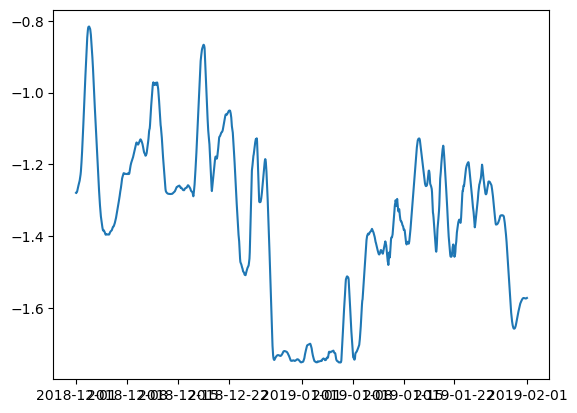

In [47]:
# # specify date to import
date_list = pd.date_range(datetime(2018, 12, 1, 0), datetime(2019, 1,31, 23), freq="H")

#============================

#  # read in the data files
df_upwelling = pd.read_csv(f"/Users/reu/Box/Data/MARES_M1_16m_2016_2019.csv", index_col=None)
times = pd.to_datetime(df_upwelling.time.values)
time_range = (times >= (date_list[0])) & (times <= (date_list[-1]))
plt.plot(times[time_range], df_upwelling.Tmean.values[time_range])

#export CSV
d = {'time': times[time_range], 'Tmean_C': df_upwelling.Tmean.values[time_range], 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
df = pd.DataFrame(data=d)
df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}upwelling_hourly.csv', index=None) #removes Index column


## export to CSV files for each year

In [45]:
d = {'time': times[time_range], 'Tmean_C': df_upwelling.Tmean.values[time_range], 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
df = pd.DataFrame(data=d)
df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}upwelling_hourly.csv', index=None) #removes Index column

In [41]:
df_upwelling[time_range]

,time,Tmean,Tmin,Tmax
720,2016-12-01 00:00:00,-1.038063,-1.326,-0.559
721,2016-12-01 01:00:00,-1.037135,-1.326,-0.559
722,2016-12-01 02:00:00,-1.025323,-1.326,-0.345
723,2016-12-01 03:00:00,-1.015187,-1.326,-0.345
724,2016-12-01 04:00:00,-1.009937,-1.326,-0.345
...,...,...,...,...
2203,2017-01-31 19:00:00,-1.423979,-1.550,-0.958
2204,2017-01-31 20:00:00,-1.405146,-1.550,-0.958
2205,2017-01-31 21:00:00,-1.389958,-1.550,-0.958
2206,2017-01-31 22:00:00,-1.379198,-1.550,-0.958
